Durante este Notebook se crearan distintos modelos capaces de clasificar imagenes de superheroes, y así, posteriormente medir qué tipo de modelo es el que cuenta con el mejor desempeño para realizar este tipo de clasificación.

Nuestro set de datos consta de un total de 250 imágenes, cada 25 representan un súperheroe diferente. de las cuales 20 serán utilizadas para entrenamiento y 5 para prueba, dandonos un total de 10 súperheroes distintos.

Para considerar funcional a alguno de nuestros modelos, esperamos que se logre un mínimo de 65% de efectividad en la clasificación de las imagenes.


# 1.- Leer los datos

Se leerá nuestro set de datos desde un archivo CSV generado con anterioridad en Orange Image Embedding

In [346]:
import pandas as pd

# Read training data from csv generated by Orange Image Embedding
train_data_csv = pd.read_csv('marveldata.csv',sep=',')

# Read data from csv generated by Orange Image Embedding
test_data_csv = pd.read_csv('marveldatatest.csv',sep=',')

# Show data from csv
train_data_csv

,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14,n15,n16,n17,n18,n19,n20,n21,n22,n23,n24,n25,n26,n27,n28,n29,n30,n31,n32,n33,n34,n35,n36,n37,n38,n39,...,n2009,n2010,n2011,n2012,n2013,n2014,n2015,n2016,n2017,n2018,n2019,n2020,n2021,n2022,n2023,n2024,n2025,n2026,n2027,n2028,n2029,n2030,n2031,n2032,n2033,n2034,n2035,n2036,n2037,n2038,n2039,n2040,n2041,n2042,n2043,n2044,n2045,n2046,n2047,category
0,0.739150,0.069297,0.187403,0.088350,0.245752,0.571480,0.270145,0.091045,0.047566,0.502979,0.313230,0.019376,0.037799,0.000000,0.192097,0.609425,0.059015,0.187967,0.264962,1.136884,0.323311,0.359296,0.122926,0.242666,0.200139,0.402265,0.049471,0.211852,0.333823,0.004252,0.553833,0.227643,0.296906,0.620404,0.485557,0.054754,0.880650,0.393440,0.320207,0.014167,...,0.619106,0.280398,0.819224,0.481646,0.668107,0.223501,0.144788,0.148230,0.801397,0.073659,1.152401,0.058073,0.225419,0.000000,1.203835,0.854978,0.826462,0.101786,0.430319,0.015646,0.570101,0.754215,0.579637,0.500593,1.197812,0.532541,0.019234,0.590735,0.036131,0.285531,0.388586,0.636728,0.620618,0.211687,0.036651,0.058336,0.062701,0.063924,0.270314,Ant-Man
1,0.761957,0.049077,0.184999,0.095908,0.010485,0.393942,0.502231,0.204015,0.364293,0.194060,0.281217,0.600912,0.115169,0.161984,0.106660,0.082570,0.018861,0.519541,0.225502,0.168848,0.317498,0.054555,0.251383,0.237183,0.351866,0.041531,0.014600,0.392138,0.220895,0.071891,0.277059,0.083212,0.170563,0.409853,0.506070,0.611665,0.295073,0.594548,0.014406,0.154987,...,0.606389,0.298388,0.124174,1.108416,0.062536,0.139892,0.093311,0.032696,0.556745,0.015735,0.713434,0.089625,0.080675,0.027616,1.564566,0.898516,1.267708,0.453138,0.220508,0.063672,0.352175,0.100210,0.068544,0.035853,0.353672,0.135931,0.383333,0.506275,0.342498,0.691350,0.399075,1.016612,0.521074,1.013747,0.025644,0.124487,0.407694,0.070617,0.219204,Ant-Man
2,0.544958,0.075456,0.413807,0.007778,0.309662,0.660897,0.475703,0.137779,0.323899,0.052203,0.494766,0.090092,0.408001,0.335377,0.126221,0.064655,0.066604,0.359561,0.082660,0.211839,0.489245,0.340233,0.487107,0.103044,0.049335,0.165146,0.034077,0.737214,0.114241,0.050161,0.139462,0.030380,0.109226,0.507103,0.112794,0.251708,0.329292,0.279353,0.034650,0.156147,...,0.457621,0.237248,0.135847,0.541780,0.008492,0.132515,0.133017,0.078153,0.529357,0.051058,1.022867,0.010951,0.189307,0.490954,0.505122,0.100519,0.819104,0.145282,0.723132,0.258191,0.209961,0.009015,0.106979,0.093957,0.562468,0.367541,0.274706,0.267634,0.106483,0.526010,0.055552,0.740573,0.700668,1.157519,0.272090,0.258990,0.310656,0.107511,0.586882,Ant-Man
3,0.669570,0.077941,0.162809,0.287013,0.181867,0.812266,0.482117,0.310983,0.064056,0.287952,0.207549,0.224299,0.391415,0.440505,0.341920,0.187703,0.016958,0.630738,0.113832,0.306949,0.262536,0.420899,0.661530,0.085573,0.672631,0.272755,0.056454,0.957526,0.852914,0.089981,0.140794,0.089652,0.053258,0.578031,1.196674,0.364663,0.397988,0.394844,0.106880,0.805180,...,0.522163,0.314164,0.512557,0.179791,0.184834,0.472429,0.022443,1.318408,0.313727,0.363296,0.769207,0.509164,0.254713,0.285594,0.321972,0.175671,1.543740,0.337691,0.012256,0.084256,0.013455,0.168302,0.531855,0.049076,0.368616,0.507348,0.115303,0.238836,0.045789,0.549655,0.024260,0.712145,0.349234,2.504792,0.044506,0.413721,0.675181,0.556684,0.360587,Ant-Man
4,0.292830,0.101596,0.120716,0.246014,0.214205,0.655638,0.777928,0.364763,0.251570,0.246432,0.180678,0.421942,0.577908,0.366368,0.262650,0.098329,0.160799,0.265265,0.269592,0.161750,0.508064,0.122198,0.514259,0.267271,0.439729,0.052519,0.067315,0.688566,0.223206,0.072987,0.290464,0.084659,0.134574,0.565559,0.326723,0.129347,0.642154,0.345410,0.029668,0.136944,...,0.683975,0.350564,0.064393,0.125303,0.100994,0.333316,0.024632,0.371287,0.178100,0.141605,0.534193,0.209663,0.219897,1.099220,0.397621,0.308252,1.437976,0.321693,0.303519,0.547121,0.783561,0.003809,0.230407,0.482175,0.355461,0.597025,0.000000,0.551853,0.128314,0.472194,0.401768,0.587151,0.326289,1.711591,0.376207,0.681590,0.878651,0.4

In [347]:
train_data_csv.shape

(210, 2049)

# 2.- Preprocesamiento de los datos

## 2.1.- Partición de los datos

Nuestro set de datos ya se encuentra dividido para entrenamiento y prueba, por lo que solo basta con leer el archivo .csv correspondiente para cada caso y quitar las columnas de información innecesarias para la realización del entrenamiento.

Además se crearán los tags correspondientes para cada set de datos con los siguientes valores:
* Ant-Man = 0
* Black Widow = 1
* DR. Strange = 2
* Gamora = 3
* Iron-Man = 4
* Loki = 5
* Spiderman = 6
* Thor = 7
* Vision = 8
* Wanda = 9

### Set De Entrenamiento

In [348]:
# Drop column of category from the data set
x_train = train_data_csv.drop(['category'], axis=1)
x_train

,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14,n15,n16,n17,n18,n19,n20,n21,n22,n23,n24,n25,n26,n27,n28,n29,n30,n31,n32,n33,n34,n35,n36,n37,n38,n39,...,n2008,n2009,n2010,n2011,n2012,n2013,n2014,n2015,n2016,n2017,n2018,n2019,n2020,n2021,n2022,n2023,n2024,n2025,n2026,n2027,n2028,n2029,n2030,n2031,n2032,n2033,n2034,n2035,n2036,n2037,n2038,n2039,n2040,n2041,n2042,n2043,n2044,n2045,n2046,n2047
0,0.739150,0.069297,0.187403,0.088350,0.245752,0.571480,0.270145,0.091045,0.047566,0.502979,0.313230,0.019376,0.037799,0.000000,0.192097,0.609425,0.059015,0.187967,0.264962,1.136884,0.323311,0.359296,0.122926,0.242666,0.200139,0.402265,0.049471,0.211852,0.333823,0.004252,0.553833,0.227643,0.296906,0.620404,0.485557,0.054754,0.880650,0.393440,0.320207,0.014167,...,0.192955,0.619106,0.280398,0.819224,0.481646,0.668107,0.223501,0.144788,0.148230,0.801397,0.073659,1.152401,0.058073,0.225419,0.000000,1.203835,0.854978,0.826462,0.101786,0.430319,0.015646,0.570101,0.754215,0.579637,0.500593,1.197812,0.532541,0.019234,0.590735,0.036131,0.285531,0.388586,0.636728,0.620618,0.211687,0.036651,0.058336,0.062701,0.063924,0.270314
1,0.761957,0.049077,0.184999,0.095908,0.010485,0.393942,0.502231,0.204015,0.364293,0.194060,0.281217,0.600912,0.115169,0.161984,0.106660,0.082570,0.018861,0.519541,0.225502,0.168848,0.317498,0.054555,0.251383,0.237183,0.351866,0.041531,0.014600,0.392138,0.220895,0.071891,0.277059,0.083212,0.170563,0.409853,0.506070,0.611665,0.295073,0.594548,0.014406,0.154987,...,0.251947,0.606389,0.298388,0.124174,1.108416,0.062536,0.139892,0.093311,0.032696,0.556745,0.015735,0.713434,0.089625,0.080675,0.027616,1.564566,0.898516,1.267708,0.453138,0.220508,0.063672,0.352175,0.100210,0.068544,0.035853,0.353672,0.135931,0.383333,0.506275,0.342498,0.691350,0.399075,1.016612,0.521074,1.013747,0.025644,0.124487,0.407694,0.070617,0.219204
2,0.544958,0.075456,0.413807,0.007778,0.309662,0.660897,0.475703,0.137779,0.323899,0.052203,0.494766,0.090092,0.408001,0.335377,0.126221,0.064655,0.066604,0.359561,0.082660,0.211839,0.489245,0.340233,0.487107,0.103044,0.049335,0.165146,0.034077,0.737214,0.114241,0.050161,0.139462,0.030380,0.109226,0.507103,0.112794,0.251708,0.329292,0.279353,0.034650,0.156147,...,0.086259,0.457621,0.237248,0.135847,0.541780,0.008492,0.132515,0.133017,0.078153,0.529357,0.051058,1.022867,0.010951,0.189307,0.490954,0.505122,0.100519,0.819104,0.145282,0.723132,0.258191,0.209961,0.009015,0.106979,0.093957,0.562468,0.367541,0.274706,0.267634,0.106483,0.526010,0.055552,0.740573,0.700668,1.157519,0.272090,0.258990,0.310656,0.107511,0.586882
3,0.669570,0.077941,0.162809,0.287013,0.181867,0.812266,0.482117,0.310983,0.064056,0.287952,0.207549,0.224299,0.391415,0.440505,0.341920,0.187703,0.016958,0.630738,0.113832,0.306949,0.262536,0.420899,0.661530,0.085573,0.672631,0.272755,0.056454,0.957526,0.852914,0.089981,0.140794,0.089652,0.053258,0.578031,1.196674,0.364663,0.397988,0.394844,0.106880,0.805180,...,0.142192,0.522163,0.314164,0.512557,0.179791,0.184834,0.472429,0.022443,1.318408,0.313727,0.363296,0.769207,0.509164,0.254713,0.285594,0.321972,0.175671,1.543740,0.337691,0.012256,0.084256,0.013455,0.168302,0.531855,0.049076,0.368616,0.507348,0.115303,0.238836,0.045789,0.549655,0.024260,0.712145,0.349234,2.504792,0.044506,0.413721,0.675181,0.556684,0.360587
4,0.292830,0.101596,0.120716,0.246014,0.214205,0.655638,0.777928,0.364763,0.251570,0.246432,0.180678,0.421942,0.577908,0.366368,0.262650,0.098329,0.160799,0.265265,0.269592,0.161750,0.508064,0.122198,0.514259,0.267271,0.439729,0.052519,0.067315,0.688566,0.223206,0.072987,0.290464,0.084659,0.134574,0.565559,0.326723,0.129347,0.642154,0.345410,0.029668,0.136944,...,0.469423,0.683975,0.350564,0.064393,0.125303,0.100994,0.333316,0.024632,0.371287,0.178100,0.141605,0.534193,0.209663,0.219897,1.099220,0.397621,0.308252,1.437976,0.321693,0.303519,0.547121,0.783561,0.003809,0.230407,0.482175,0.355461,0.597025,0.000000,0.551853,0.128314,0.472194,0.401768,0.587151,0.326289,1.711591,0.376207,0.681590,0.

A continuación se crean los target para nuestro set de entranamiento

In [349]:
#Creamos los respectivos targets,
antman_target = np.full(20,0)
black_widow_target = np.full(20,1)
strange_target = np.full(20,2)
gamora_target = np.full(21,3)
iron_man_target = np.full(25,4)
loki_target = np.full(20,5)
spiderman_target = np.full(20,6)
thor_target = np.full(23,7)
vision_target = np.full(20,8)
wanda_target = np.full(21,9)


#Concatenamos todos los targets
y_train = np.concatenate((
    antman_target,
    black_widow_target,
    strange_target,
    gamora_target,
    iron_man_target,
    loki_target,
    spiderman_target,
    thor_target,
    vision_target,
    wanda_target
), axis=0)

y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9])

In [350]:
print("Shape of x_train: {}".format(x_train.shape))
print("Shape of y_train: {}".format(y_train.shape))

Shape of x_train: (210, 2048)
Shape of y_train: (210,)


### Set De Prueba

In [351]:
# Drop column of category from the data set
x_test = test_data_csv.drop(['category'], axis=1)
x_test.head(10)

,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14,n15,n16,n17,n18,n19,n20,n21,n22,n23,n24,n25,n26,n27,n28,n29,n30,n31,n32,n33,n34,n35,n36,n37,n38,n39,...,n2008,n2009,n2010,n2011,n2012,n2013,n2014,n2015,n2016,n2017,n2018,n2019,n2020,n2021,n2022,n2023,n2024,n2025,n2026,n2027,n2028,n2029,n2030,n2031,n2032,n2033,n2034,n2035,n2036,n2037,n2038,n2039,n2040,n2041,n2042,n2043,n2044,n2045,n2046,n2047
0,0.372412,0.205938,0.185385,0.246163,0.218303,0.479453,0.201634,0.121680,0.660750,0.515199,0.620891,0.035547,0.153774,0.315447,0.130344,0.188178,0.069736,0.846240,0.400415,0.170333,0.097058,0.244546,0.152441,0.501578,0.490432,0.129596,0.029517,0.600686,0.266285,0.349233,0.291033,0.037886,0.521378,0.329016,1.042956,0.406036,0.431665,0.312806,0.301125,0.283091,...,0.425511,0.497563,0.134431,0.700823,0.052182,0.230188,0.158365,0.113217,0.254751,0.225175,0.142570,0.513452,0.530281,0.147355,0.595450,0.914724,0.594298,1.301183,0.848895,0.651624,0.547858,0.093102,0.051337,0.155987,0.333220,0.102932,0.458311,0.135255,1.254522,0.103064,0.364618,0.026575,0.196505,0.125559,0.189281,0.180232,0.303250,0.532171,0.270970,0.906623
1,0.370281,0.060479,0.519935,0.035705,0.041687,0.224904,0.773626,0.285506,0.392602,0.288385,0.023794,0.201939,0.390604,0.209319,0.130971,0.345528,0.189592,0.239223,0.098182,0.125295,0.206349,0.523015,0.623727,0.051762,0.369885,0.079129,0.054229,0.441177,0.616457,0.125586,0.453649,0.081724,1.590520,0.741822,0.865078,0.388983,1.158504,0.240864,0.338013,0.127888,...,0.145109,0.809146,0.777671,0.590068,1.491905,0.271432,0.065983,0.313708,0.826911,0.023583,0.212539,1.499570,1.285707,0.220904,0.118330,0.499774,0.911817,0.394935,0.719661,0.070086,0.362481,0.500557,0.146260,0.391939,0.942877,0.534473,0.438395,0.421702,0.462353,0.322275,0.171601,0.344472,0.405146,1.155041,0.141007,0.082212,0.382798,0.988594,0.263656,0.827599
2,0.483583,0.180298,0.130267,0.014420,0.213938,0.470700,0.846835,0.261992,0.354416,0.156630,0.093617,0.089536,0.604391,0.269457,0.241858,0.076815,0.103584,0.290931,0.339591,0.169497,0.450831,0.336106,0.088595,0.028358,0.028582,0.215572,0.017510,0.618700,0.325348,0.000000,0.130092,0.266851,0.185177,0.299956,0.580609,0.074676,0.244740,0.110210,0.038454,0.356122,...,0.619722,0.463207,0.171171,0.010135,0.105118,0.232623,0.183680,0.129183,0.138892,0.351632,0.069579,0.703380,0.242697,0.194197,1.042417,0.871240,0.096330,0.943902,0.041513,0.317122,0.012535,0.057677,0.017023,0.129724,0.074652,0.268463,1.147461,0.000287,0.000000,0.032565,0.192453,0.515471,0.107790,0.885492,0.660234,0.007884,0.048810,0.361410,0.386771,0.423432
3,0.773020,0.052978,0.320455,0.093553,0.389705,0.749666,0.576983,0.170230,0.654389,0.210279,0.056230,0.492405,0.187524,0.197101,0.167327,0.570332,0.140752,0.412840,0.540352,0.461233,0.317153,0.375188,0.109209,0.207434,0.148822,0.371293,0.050368,0.573582,0.812962,0.284802,0.129256,0.197146,0.276710,0.818751,1.188482,0.116643,0.501546,0.444547,0.122732,0.342155,...,0.108073,0.539038,0.402359,0.485667,0.293937,0.756470,0.090267,1.033420,0.357210,0.306439,0.587517,0.567299,0.777335,0.734138,0.453707,0.447869,0.472712,1.137723,0.106765,0.936805,0.364493,0.590466,0.396649,0.099951,0.054169,0.094685,0.317776,0.047006,0.487493,0.017451,0.342809,0.158935,0.787047,0.552172,0.420241,0.130727,0.266412,0.948913,0.845953,0.908990
4,2.179136,0.112517,0.497513,0.388409,0.403948,0.785570,0.418568,0.358883,0.676947,0.386170,0.818630,0.159199,0.300611,0.406376,0.035332,0.056125,0.146453,0.345249,0.062500,0.429780,0.450215,0.713463,0.562280,0.146659,0.466683,0.553646,0.134292,1.020291,0.472508,0.062020,0.290765,0.331511,0.426713,0.383284,1.061136,0.434309,1.261054,0.363700,0.153623,0.060025,...,0.324881,1.664733,0.711794,0.556287,1.041851,0.077063,0.504914,0.238431,0.145702,0.356252,0.018673,0.724043,0.241606,0.074795,0.177624,0.458319,0.289820,1.813692,0.328732,0.684570,0.153000,0.336315,0.305014,0.334868,0.649614,0.740316,0.466029,0.001706,0.269278,0.071271,0.027405,0.070012,0.264858,1.250272,0.400877,0.168818,0.383407,0.

Al igual que con el set de entrenamiento, se procede a la creación de los target correspondientes para nuestro set de pruebas

In [352]:
#Creamos los respectivos targets,
antman_target = np.full(5,0)
black_widow_target = np.full(5,1)
strange_target = np.full(5,2)
gamora_target = np.full(5,3)
iron_man_target = np.full(5,4)
loki_target = np.full(6,5)
spiderman_target = np.full(5,6)
thor_target = np.full(7,7)
vision_target = np.full(5,8)
wanda_target = np.full(5,9)


#Concatenamos todos los targets
y_test = np.concatenate((
    antman_target,
    black_widow_target,
    strange_target,
    gamora_target,
    iron_man_target,
    loki_target,
    spiderman_target,
    thor_target,
    vision_target,
    wanda_target
), axis=0)

y_test

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 8,
       8, 8, 8, 8, 9, 9, 9, 9, 9])

In [353]:
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of x_test: (53, 2048)
Shape of y_test: (53,)


## 2.2.- Visualización de los datos

In [354]:
import os 
import cv2 
from tqdm import tqdm

data_black_widow = []
black_widow = 'imagenes_marvel/Marvel/BlackWidow'

data_wanda = []
wanda = 'imagenes_marvel/Marvel/Wanda'

for image1 in tqdm(os.listdir(black_widow)): 
    path = os.path.join(black_widow, image1)
    img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    data_black_widow.append(img1)

for image2 in tqdm(os.listdir(wanda)): 
    path = os.path.join(wanda, image2)
    img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    data_wanda.append(img2)

100%|██████████| 22/22 [00:00<00:00, 61.71it/s]


Text(0.5, 1.0, 'Wanda')

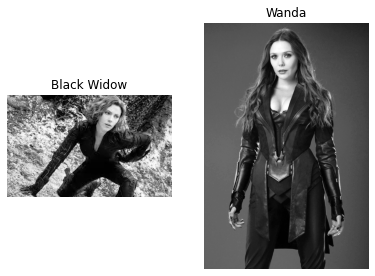

In [355]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

np_img=np.asarray(data_black_widow[0])
plt.subplot(1, 3, 1)
plt.imshow(np_img,cmap='Greys_r')
plt.axis('off')
plt.title("Black Widow")

np_img=np.asarray(data_wanda[0])
plt.subplot(1, 3, 2)
plt.imshow(np_img,cmap='Greys_r')
plt.axis('off')
plt.title("Wanda")

# 3.- Creación de modelos

Los modelos que se utilizaran para la clasificación serán:

1. Random Forest con 10 y 5 arboles
2. Support Vector Machines con kernel radial y polinomial
3. Redes Neuronales con 1 y 2 capas intermedias.

## 3.1.- Random Forest

Random Forest es una combinación de árboles predictores, en donde cada árbol depende de los valores de un vector aleatorio probado independientemente y con la misma distribución para cada uno de ellos.

La dinámica del mismo consiste en construir una colección de árboles no correlacionados para promediarlos.

En esta ocasión crearemos dos instancias de random forest con cinco y diez áboles para evaluar la veracidad y precisión del modelo al clasificar nuestra colección de imagenes

In [356]:
from sklearn.ensemble import RandomForestClassifier

# Random forest with 5 trees
randomForest_5Trees = RandomForestClassifier(n_estimators=5)

# Random forest with 10 trees
randomForest_10Trees = RandomForestClassifier(n_estimators=10)


Es importante mencionar que se optó por no definir una profundidad específica para los árboles, ya que, al no especificar la misma, el constructor de los modelos expanderá los nodos hasta que todas las hojas sean puras, creando un árbol lo suficientemente grande para lograr transmitir información más precisa


## 3.2.- Support Vector Machines (SVM)

Los SVM son un conjunto de algoritmos de aprendizaje supervisado relacionados con problemas de clasificación y regresión. Dado un conjunto de datos de entrenamiento podemos etiquetar las clases y entrenar una SVM para construir un modelo que prediga la clase de una nueva muestra.

Este modelo representa a los puntos de muestra en el espacio, separando las clases mediante un hiperplano de separación definido como el vector soporte.

### Kernel
Un kernel es un tipo especializado de función de similitud. Toma dos puntos como entrada y devuelve su similitud como salida.

Las métricas de similitud pueden expresarse en términos de un producto escalar en algún espacio dimensional alto. Esto significa que los cálculos realizados en espacios de gran dimensión pueden reformularse en términos de productos escalares.

Por lo tanto, podemos tomar dicha entrada para transferirla a un espacio dimensional extremadamente alto y ejecutar nuestro algoritmo en ese espacio usando la función del kernel para medir la distancia, en lugar de calcularla directamente, para posteriormente transferir los resultados al espacio de entrada original.

#### Kernel Polinomial
El kernel polinomial no solo observa las características dadas por las muestras de entrada para determinar su similitud, sino también las combinaciones de éstas. Con “n” características originales y “d” grados de polinomio produce n^d características expandidas.

Cada entidad x se copia en x^2, x^3, y así sucesivamente, luego se dibujan hiperplanos separadores.

#### Kernel Radial
RBF es la abreviatura de "Radial Basis Function", y es la opción de kernel más popular, se trata de un tipo de función que es utilizada para aproximar otras funciones, básicamente se traduce en el kernel que puede crear los límites más complejos disponibles para sklearn.

Los RBF también están detrás del suavizado del kernel y, a través de eso, de la estimación de la densidad del kernel.

Calcular un kernel RBF es muy caro, y a medida que el número de muestras excede las decenas de miles se vuelve intratable desde el punto de vista computacional 

### Modelos
Para realizar la clasificación de nuestro set de datos crearemos modelos de SVM con los dos diferentes tipos de kernel explicados con anterioridad;  *Polinomial y Radial*

In [357]:
from sklearn.svm import SVC

# Support Vector Machines with polynomial kernel
poly_svm = SVC(C=100, kernel='poly')

# Support Vector Machines with radial kernel
radial_svm = SVC(C=100, kernel='rbf')

### Regularización
Debido a que se están transformando datos en espacios de mayor dimensión, los algoritmos que utilizan el truco del kernel tienden a sobreajustarse. Sin embargo, los parámetros de regularización son útiles para controlar esto. Sklearn proporciona funciones C y gamma para este propósito.

C es un costo fijo que se agrega cada vez que se calcula la similitud. Los niveles más altos de C "borran" la optimización de los hiperplanos de máxima separación generados por la SVM, lo que da como resultado límites de decisión más complejos y, por lo tanto, un mayor nivel de ajuste.

## 3.3 Neural Networks

Una red neuronal es un modelo simplificado que emula el modo en que el cerebro humano procesa la información: Funciona simultaneando un número elevado de unidades de procesamiento interconectadas.

Las unidades de procesamiento se organizan en capas. Hay tres partes normalmente en una red neuronal:

1. Una capa de entrada, con unidades que representan los campos de entrada
2. Una o varias capas ocultas
3. Una capa de salida, con una unidad o unidades que representa el campo o los campos de destino.

Las unidades se conectan con fuerzas de conexión variables o ponderaciones.

Los datos de entrada se presentan en la primera capa, y los valores se propagan desde cada neurona hasta cada neurona de la capa siguiente. al final, se envía un resultado desde la capa de salida.

In [358]:
from sklearn.neural_network import MLPClassifier

## Neural Networks with 1 layer and 1000 neurons
nn_oneLayer = MLPClassifier(random_state=1, hidden_layer_sizes=(1000,), max_iter=300)

## Neural Networks with 2 layers, 300 and 150 neurons
nn_twoLayers = MLPClassifier(random_state=1, hidden_layer_sizes=(300, 150), max_iter=300)


Para la clasificación de nuestras imágenes, optamos por utilizar dos modelos, con una y dos capas ocultas, las cuales tienen 1,000 y 300, 150 neuronas respectivamente.


# 4.- Ajustar modelos

El proceso de entrenamiento de un modelo consiste en proporcionar datos de entrenamiento de los cuales aprender.

Los datos de entrenamiento consisten en listas de elementos con algún orden especificado entre elementos en cada lista. Este orden es inducido por dar una puntuación numérica u ordinal o un juicio binario para cada elemento.

Estos datos deben contener la respuesta correcta, que se conoce como destino o atributo de destino. El algoritmo de aprendizaje encuentra patrones en los datos de entrenamiento que asignan los atributos de los datos de entrada al destino (la respuesta que desea predecir) y genera un modelo que captura dichos patrones.


## 4.1.- Random Forest

In [359]:
# Random forest with 5 trees
randomForest_5Trees.fit(x_train, y_train)

# Random forest with 10 trees
randomForest_10Trees.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## 4.2.- Support Vector Machines (SVM)

In [360]:
# Support Vector Machines with polynomial kernel
poly_svm.fit(x_train, y_train)

# Support Vector Machines with radial kernel
radial_svm.fit(x_train, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## 4.3.- Neural Networks

In [361]:
# Neural Networks

## Neural Networks with 1 layer and 1,000 neurons
nn_oneLayer.fit(x_train, y_train)

## Neural Networks with 2 layers, 300 and 150 neurons
nn_twoLayers.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(300, 150), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

# 5.- Predicción con datos nuevos

Se pueden utilizar los modelos entrenados para obtener predicciones sobre datos nuevos para los que no se conoce la respuesta de destino.

A continuación almacenaremos las predicciones hechas por cada uno de nuestros modelos en variables que serán de gran utilidad para visualizar los resultados y calificar el desempeño de nuestros modelos


## 5.1.- Random Forest

In [362]:
# Random forest with 5 trees
y_predict_randomForest_5Trees = randomForest_5Trees.predict(x_test)

# Random forest with 10 trees
y_predict_randomForest_10Trees = randomForest_10Trees.predict(x_test)

## 5.2.- Support Vector Machines (SVM)

In [363]:
# Support Vector Machines with polynomial kernel
y_predict_poly_svm = poly_svm.predict(x_test)

# Support Vector Machines with radial kernel
y_predict_radial_svm = radial_svm.predict(x_test)

## 5.3.- Neural Networks

In [364]:
## Neural Networks with 1 layer and 1000 neurons
y_predict_nn_oneLayer = nn_oneLayer.predict(x_test)

## Neural Networks with 2 layers, 300 and 150 neurons
y_predict_nn_twoLayers = nn_twoLayers.predict(x_test)

# 6.- Resultados

En esta sección se podrá visualizar la efectividad de nuestros modelos creados, analizando y comparando la calificación de los mismos en terminos porcentuales.

Las estrategias que utilizaremos para medir la eficiencia serán:
1. Cross Validation
2. Accuracy Score
3. Confusion Matrix

## 6.1.- Cross validation
Técnica utilizada para evaluar los resultados de un análisis estadístico y garantizar que son independientes de la partición entre datos de entrenamiento y prueba.

Consiste en repetir y calcular la media aritmética obtenida de las medidas de evaluación sobre diferentes particiones. Se utiliza en entornos donde el objetivo principal es la predicción y se quiere estimar la precisión de un modelo 

In [365]:
from sklearn.model_selection import cross_val_score

# Random forest with 5 trees
cv_randomForest_5Trees = cross_val_score(randomForest_5Trees, x_test, y_test, cv=3, scoring="accuracy")

# Random forest with 10 trees
cv_randomForest_10Trees = cross_val_score(randomForest_10Trees, x_test, y_test, cv=3, scoring="accuracy")

# Support Vector Machines with polynomial kernel
cv_poly_svm = cross_val_score(poly_svm, x_test, y_test, cv=3, scoring="accuracy")

# Support Vector Machines with radial kernel
cv_radial_svm = cross_val_score(radial_svm, x_test, y_test, cv=3, scoring="accuracy")

# Neural Network with 1 layer
cv_nn_oneLayer = cross_val_score(nn_oneLayer, x_test, y_test, cv=3, scoring="accuracy")

# Neural Network with 2 layers
cv_nn_twoLayers = cross_val_score(nn_twoLayers, x_test, y_test, cv=3, scoring="accuracy")

In [366]:
cv_table = {
    'RF 5 trees': cv_randomForest_5Trees,
    'RF 10 trees': cv_randomForest_10Trees,
    'Polynomial SVM': cv_poly_svm,
    'RBF SVM': cv_radial_svm,
    'NN 1 layer': cv_nn_oneLayer,
    'NN 2 layers': cv_nn_twoLayers
}
pd.DataFrame(cv_table)

,RF 5 trees,RF 10 trees,Polynomial SVM,RBF SVM,NN 1 layer,NN 2 layers
0,0.166667,0.166667,0.388889,0.333333,0.333333,0.388889
1,0.055556,0.277778,0.611111,0.388889,0.444444,0.500000
2,0.117647,0.117647,0.352941,0.352941,0.411765,0.411765


## 6.2.- Accuracy Score
El accuracy score es una métrica para evaluar modelos de clasificación. Informalmente, el accuracy es la fracción de predicciones que el modelo realizó correctamente.

En la clasificación de etiquetas múltiples, esta función calcula la precisión del subconjunto: el conjunto de etiquetas predichas para una muestra debe coincidir exactamente con el conjunto de etiquetas correspondiente.

In [367]:
from sklearn.metrics import accuracy_score

# Accuracy of Random forest with 5 trees
acc_randomForest_5Trees = accuracy_score(y_test, y_predict_randomForest_5Trees)

# Accuracy of Random forest with 10 trees
acc_randomForest_10Trees = accuracy_score(y_test, y_predict_randomForest_10Trees)

# Support Vector Machines with polynomial kernel
acc_poly_svm = accuracy_score(y_test, y_predict_poly_svm)

# Support Vector Machines with radial kernel
acc_radial_svm = accuracy_score(y_test, y_predict_radial_svm)

# Neural Network with 1 layer
acc_nn_oneLayer = accuracy_score(y_test, y_predict_nn_oneLayer)

# Neural Network with 2 layers
acc_nn_twoLayers = accuracy_score(y_test, y_predict_nn_twoLayers)

In [368]:
acc_table = {
  'RF 5 trees': acc_randomForest_5Trees,
  'RF 10 trees': acc_randomForest_10Trees,
  'Polynomial SVM': acc_poly_svm,
  'RBF SVM': acc_radial_svm,
  'NN 1 layer': acc_nn_oneLayer,
  'NN 2 layers': acc_nn_twoLayers
}
pd.DataFrame(acc_table, index=[0])

,RF 5 trees,RF 10 trees,Polynomial SVM,RBF SVM,NN 1 layer,NN 2 layers
0,0.264151,0.358491,0.660377,0.716981,0.716981,0.716981


## 6.4.- Confusion Matrix
Una Confusion Matrix es una herramienta que permite la visualización del desempeño de un algoritmo. Cada columna de la matriz representa el número de predicciones de cada clase, mientras que cada fila representa a las instancias en la clase real.

Uno de los beneficios de las matrices de confusión es que facilitan ver si el sistema está confundiendo las clases.

In [369]:
from sklearn import metrics
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

labelNames = ["Ant-Man", "Black Widow", "DR. Strange", "Gamora", "Iron-Man", "Loki", "Spider-Man", "Thor", "Vision", "Wanda"]

# Print markdown style
def printmd(string):
    display(Markdown(string))
    
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=90)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### 6.4.1.- Random Forest

#### Five Trees

In [370]:
# Confusion Matrix of Random forest with 5 trees
cm_randomForest_5Trees = metrics.confusion_matrix(y_test, y_predict_randomForest_5Trees)
print("Confusion matrix: \n", cm_randomForest_5Trees)

Confusion matrix: 
 [[1 0 0 0 3 0 0 1 0 0]
 [0 2 0 0 0 0 0 0 1 2]
 [0 0 3 0 1 0 0 0 1 0]
 [1 0 0 1 1 0 0 1 0 1]
 [3 0 0 0 0 0 0 1 1 0]
 [1 0 0 0 1 2 1 0 1 0]
 [2 0 1 0 0 0 1 0 1 0]
 [2 1 1 1 1 0 0 0 1 0]
 [1 0 1 0 0 0 1 0 2 0]
 [1 0 0 1 0 1 0 0 0 2]]


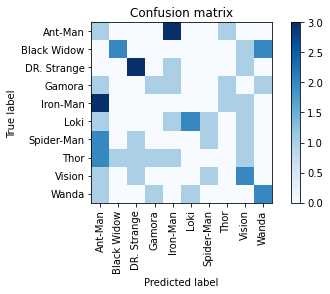

In [371]:
plt.figure()
plot_confusion_matrix(cm_randomForest_5Trees, labelNames)
plt.show()

#### Ten Trees

In [372]:
# Confusion Matrix of Random forest with 10 trees
cm_randomForest_10Trees = metrics.confusion_matrix(y_test, y_predict_randomForest_10Trees)
print("Confusion matrix: \n", cm_randomForest_10Trees)

Confusion matrix: 
 [[1 1 0 0 1 0 0 1 1 0]
 [0 2 0 0 0 1 0 0 0 2]
 [2 1 2 0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0]
 [2 1 0 0 1 1 0 0 0 0]
 [0 0 1 1 0 3 0 0 0 1]
 [3 0 0 0 0 0 2 0 0 0]
 [2 0 1 1 1 1 0 0 0 1]
 [0 1 1 0 1 0 0 0 2 0]
 [0 2 1 1 0 0 0 0 0 1]]


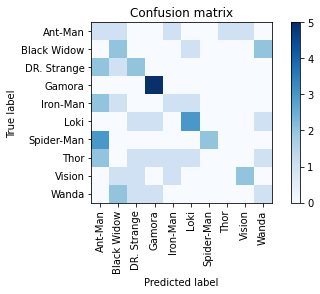

In [373]:
plt.figure()
plot_confusion_matrix(cm_randomForest_10Trees, labelNames)
plt.show()

### 6.4.2.- Support Vector Machines (SVM)

#### Polynomial

In [374]:
# Confusion Matrix of SVM Polynomial kernel
cm_poly_svm = metrics.confusion_matrix(y_test, y_predict_poly_svm)
print("Confusion matrix: \n", cm_poly_svm)

Confusion matrix: 
 [[2 0 1 0 0 1 1 0 0 0]
 [0 3 0 0 0 0 0 0 0 2]
 [0 0 4 0 0 1 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 2 0]
 [0 0 0 1 0 5 0 0 0 0]
 [0 0 1 0 0 0 3 1 0 0]
 [3 0 0 1 0 0 0 2 1 0]
 [0 0 0 0 0 0 0 0 5 0]
 [0 0 0 1 0 1 0 0 0 3]]


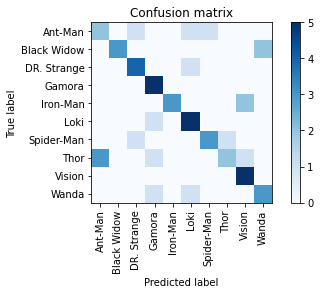

In [375]:
plt.figure()
plot_confusion_matrix(cm_poly_svm, labelNames)
plt.show()

#### Radial

In [376]:
# Confusion Matrix of SVM Polynomial kernel
cm_radial_svm = metrics.confusion_matrix(y_test, y_predict_radial_svm)
print("Confusion matrix: \n", cm_radial_svm)

Confusion matrix: 
 [[2 0 1 0 0 1 1 0 0 0]
 [0 3 0 0 0 0 0 0 0 2]
 [0 0 5 0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0]
 [1 0 0 0 3 0 0 0 1 0]
 [0 0 0 1 0 5 0 0 0 0]
 [0 0 1 0 0 0 3 1 0 0]
 [2 0 1 0 1 0 0 3 0 0]
 [0 0 0 0 0 0 0 0 5 0]
 [0 0 0 0 0 1 0 0 0 4]]


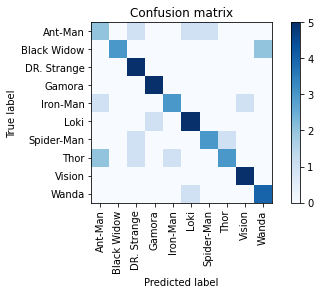

In [377]:
plt.figure()
plot_confusion_matrix(cm_radial_svm, labelNames)
plt.show()

### 6.4.3.- Neural Networks

#### One Layer

In [378]:
# Confusion Matrix of Neural Networks with 1 layer
cm_nn_oneLayer = metrics.confusion_matrix(y_test, y_predict_nn_oneLayer)
print("Confusion matrix: \n", cm_nn_oneLayer)

Confusion matrix: 
 [[2 0 1 0 0 1 1 0 0 0]
 [0 3 0 0 0 0 0 0 0 2]
 [0 0 4 0 0 0 0 0 0 1]
 [0 0 0 5 0 0 0 0 0 0]
 [1 0 0 0 3 1 0 0 0 0]
 [0 0 0 1 0 5 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0]
 [2 0 2 1 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 5 0]
 [0 0 0 0 0 1 0 0 0 4]]


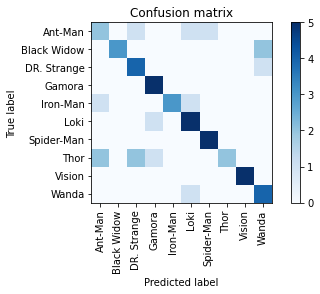

In [379]:
plt.figure()
plot_confusion_matrix(cm_nn_oneLayer, labelNames)
plt.show()

#### Two Layers

In [380]:
# Confusion Matrix of Neural Networks with 2 layers
cm_nn_twoLayers = metrics.confusion_matrix(y_test, y_predict_nn_twoLayers)
print("Confusion matrix: \n", cm_nn_twoLayers)

Confusion matrix: 
 [[3 0 1 0 0 1 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 2]
 [0 0 4 0 0 0 0 0 0 1]
 [0 0 0 5 0 0 0 0 0 0]
 [1 0 0 0 3 0 0 0 1 0]
 [0 0 0 0 1 5 0 0 0 0]
 [0 0 0 0 0 0 4 0 1 0]
 [2 0 2 0 1 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 5 0]
 [0 0 0 0 0 1 0 0 0 4]]


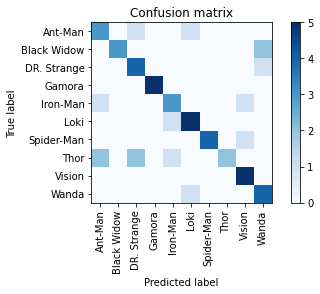

In [381]:
plt.figure()
plot_confusion_matrix(cm_nn_twoLayers, labelNames)
plt.show()